# External perturbations

One last ingredient we may want to include in a lens model is external perturbations. These may be due to matter along the line of sight or in the environment surrounding the lens. Often, we try to model these perturbations in terms of mass sheets (if no prefereed direction has to be included). Alternatively, if the lens is located in the proximity of some other mass, the perturbative effects of this last may be modeled in terms of an external shear.

## Mass sheets

A mass sheet is a layer of constant surface density that we may want to sum up to the mass distribution of our lens.

In this exercise, we will try to model it in terms of a perturbing potential $\psi_{ext}$. This potential must satisfy some conditions:

* we want $\kappa=const=\kappa_{ext}$:
$$
\frac{1}{2}\left(\psi_{{ext},11}+\psi_{{ext},22}\right)=\kappa_{ext}
$$
* in addition, we impose that $\gamma_{ext}=0$, so that no preferred direction of distortion is introduced by the perturbing potential:
$$
\gamma_{1,ext}=\frac{1}{2}\left(\psi_{{ext},11}-\psi_{{ext},22}\right)=0
$$
and 
$$
\gamma_{2,ext}=\psi_{{ext},12}=\psi_{{ext},21}=0
$$

These conditions imply that the potential must be a quadratic function of $x_1$ and $x_2$. Thus, we can write it in the most general form as

$$
\psi_{ext}=C_1x_1^2+C_2x_2^2+C_3x_1x_2+C_4x_1+C_5x_2+C_6
$$

and the conditions above allow us to determine the link between some of the $C_i$ coefficients and $\kappa_{ext}$. More precisely,

$$
C_3=0 \\
C_1=C_2 \\
C_1+C_2=\kappa_{ext}
$$

which implies

$$
\psi_{ext}=\frac{\kappa_{ext}}{2}(x_1^2+x_2^2)+C_4x_1+C_5x_2+C_6
$$


$C_4$, $C_5$ and $C_6$ are completely arbitrary: the potential corresponding to a layer is not unique. 

The deflection angle is 
$$
\vec\alpha_{ext}=\vec\nabla\psi_{ext}
$$
or 
$$
\alpha_{ext,1}=\kappa_{ext} x_1+C_4 \\
\alpha_{ext,2}=\kappa_{ext} x_2+C_5
$$

meaning that the deflection angle is not unique either. 

Choosing $C_4$ and $C_5$ equal zero:
$$
\vec\alpha_{ext}=\kappa_{ext}\vec{x}
$$
implying that the lens equation in the case of a mass sheet can be written as

$$
\vec y = \vec x(1-\kappa_{ext})
$$

As we have seen already, if $\kappa_{ext}=1$, the mass sheet is perferctly converging. 

## External shear

Also an external shear may be modeled in terms of a perturbing potential. In this case, the conditions are:
$$
\frac{1}{2}\left(\psi_{{ext},11}-\psi_{{ext},22}\right)=\gamma_{ext}\cos 2\phi \\
\psi_{{ext},12}=\psi_{{ext},21}=\gamma_{ext}\sin 2\phi \\
\frac{1}{2}\left(\psi_{{ext},11}-\psi_{{ext},22}\right)=0
$$

Again the potential must be quadratic in $x_1$ and $x_2$. Using exactly the same form of the potential as done above, the new conditions on the coefficients $C_i$ are

$$
C_1-C_2=\gamma_{ext}\cos 2\phi \\
C_3=\gamma_{ext}\sin 2\phi \\
C_1=-C_2
$$

which leads to
$$
C_1=\frac{\gamma_{ext} \cos 2\phi}{2} \\
C_2=-\frac{\gamma_{ext} \cos 2\phi}{2} \\
C_3=\gamma_2 \;.
$$

thus the potential is now
$$
\psi_{ext}=\frac{\gamma_{ext}}{2}\cos 2\phi(x_1^2-x_2^2)+\gamma_{ext}\sin 2\phi x_1 x_2+...
$$

and the deflection angle is

$$
\vec\alpha_{ext,1}=\gamma_{ext}\cos 2\phi x_1+\gamma_{ext}\sin 2\phi x_2+C_4 \\
\vec\alpha_{ext,2}=-\gamma_{ext}\cos 2\phi x_2+\gamma_{ext}\sin 2\phi x_1+C_5
$$

Choosing $C_4=C_5=0$, we obtains
$$
\vec\alpha_{ext}=\left[ \begin{array}{c} \gamma_1 & \gamma_2 \\ -\gamma_2 & \gamma_1 \end{array} \right] \vec x 
$$

## Example: a perturbed NIS 

In the following example, we will take a NIS lens and we will perturb it by adding an external shear and by placing a mass sheet in front of the lens.

Then we will derive the lens properties by means of the derivatives of the lensing potential. We will consider 4 cases, namely:

* unperturbed NIS
* NIS + mass sheet
* NIS + external shear
* NIS + mass sheet + external shear

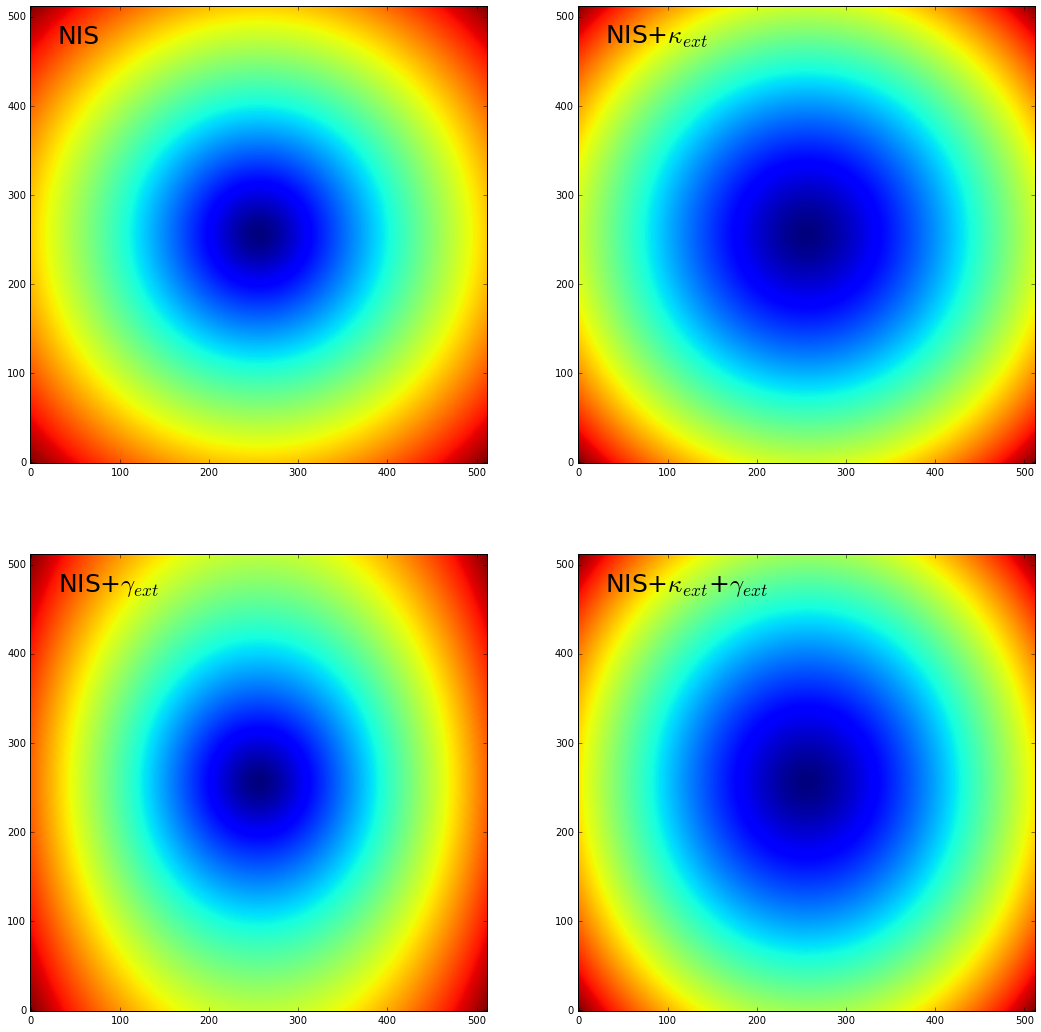

In [1]:
# step 1: build a potential map

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def psi_nie(xk,yk,f,xc):

    mappa=[]
    for i in range(xk.size):
        for j in range(yk.size):
            mappa.append(np.sqrt(xk[i]*xk[i]+f**2*yk[j]*yk[j]+xc*xc))
    mappa=np.array(mappa)
    mappa=mappa.reshape([xk.size,yk.size],order='F')

    return(np.abs(mappa))

f=1.0 # NB: I am using the same lines of code used above but I am setting f=1.0 so that 
      # my model is circular
xc=0.2
xmin=-3
xmax=3
ymin=-3
ymax=3
npix=512

xk=np.linspace(xmin,xmax,npix)
yk=np.linspace(ymin,ymax,npix)

psi=psi_nie(xk,yk,f,xc)

def psi_kappa(xk,yk,kext):
    mappa=[]
    for i in range(xk.size):
        for j in range(yk.size):
            mappa.append(kext/2*(xk[i]**2+yk[j]**2))
    mappa=np.array(mappa)
    mappa=mappa.reshape([xk.size,yk.size],order='F')

    return(mappa)

kext=0.4
psi_k=psi_kappa(xk,yk,kext)

def psi_gamma(xk,yk,gext,phi):
    mappa=[]
    for i in range(xk.size):
        for j in range(yk.size):
            mappa.append(gext/2.0*(xk[i]**2-yk[j]**2)*np.cos(2.0*phi)+
                    gext*np.sin(2.0*phi)*xk[i]*yk[j])
    mappa=np.array(mappa)
    mappa=mappa.reshape([xk.size,yk.size],order='F')

    return(mappa)

gext=0.1
phi=np.pi
psi_g=psi_gamma(xk,yk,gext,phi)


fig,ax=plt.subplots(2,2,figsize=(18,18))
ax[0,0].imshow(psi,origin='low')
ax[0,1].imshow(psi+psi_k,origin='low')
ax[1,0].imshow(psi+psi_g,origin='low')
ax[1,1].imshow(psi+psi_g+psi_k,origin='low')

ax[0,0].text(30,470,'NIS',fontsize=25,fontweight=5,color='black')
ax[0,1].text(30,470,'NIS+$\kappa_{ext}$',fontsize=25,fontweight=5,color='black')
ax[1,0].text(30,470,'NIS+$\gamma_{ext}$',fontsize=25,fontweight=5,color='black')
ax[1,1].text(30,470,'NIS+$\kappa_{ext}$+$\gamma_{ext}$',fontsize=25,fontweight=5,color='black')

As expected, the mass sheet makes the potential stronger, but does not affect its shape. On the contrary, an external shear distorts  the shape of the iso-potential contours, making them elliptical!

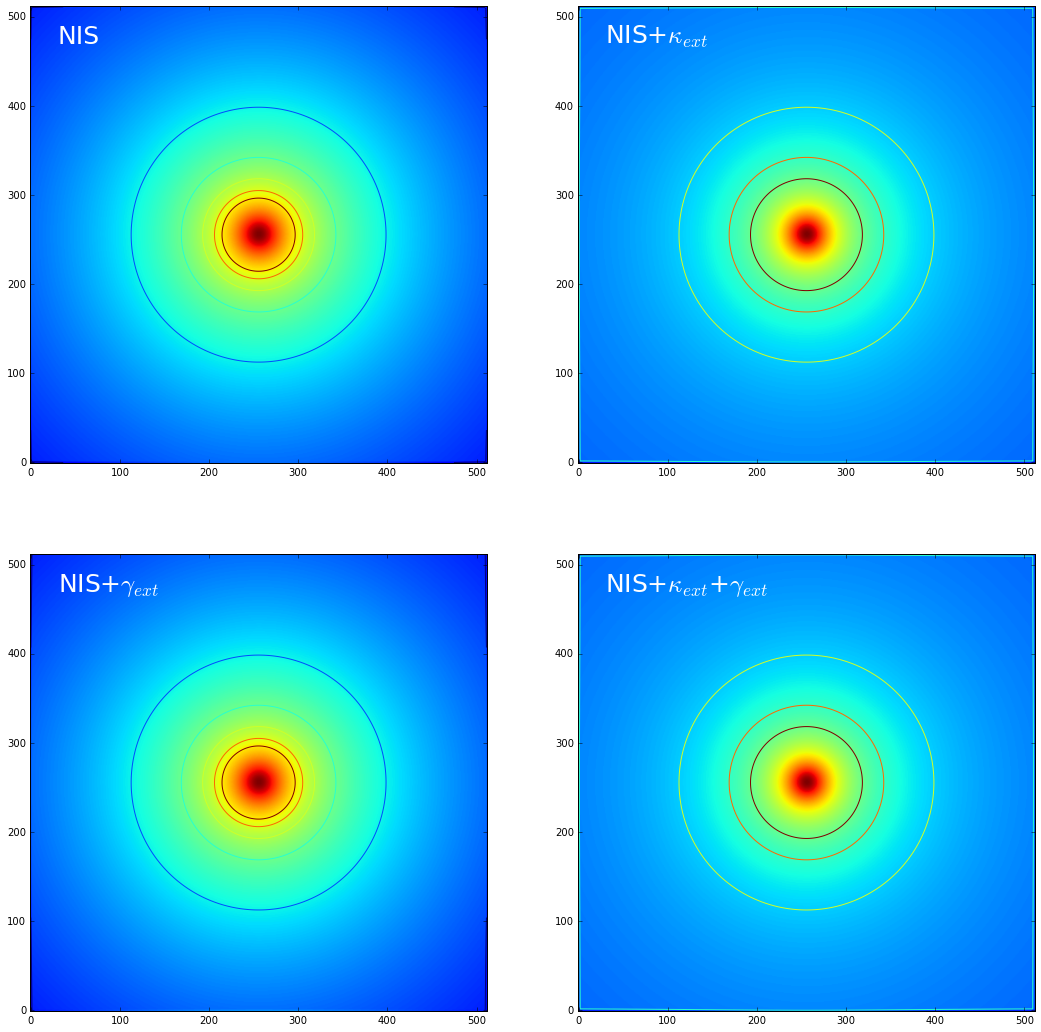

In [4]:
dx=float(xmax-xmin)/(npix-1)

from matplotlib.colors import LogNorm, SymLogNorm

alpha2,alpha1=np.gradient(psi,dx,dx)
alpha2k,alpha1k=np.gradient(psi_k,dx,dx)
alpha2g,alpha1g=np.gradient(psi_g,dx,dx)

da1dx2,da1dx1=np.gradient(alpha1,dx,dx)
da2dx2,da2dx1=np.gradient(alpha2,dx,dx)

da1dx2k,da1dx1k=np.gradient(alpha1+alpha1k,dx,dx)
da2dx2k,da2dx1k=np.gradient(alpha2+alpha2k,dx,dx)

da1dx2g,da1dx1g=np.gradient(alpha1+alpha1g,dx,dx)
da2dx2g,da2dx1g=np.gradient(alpha2+alpha2g,dx,dx)

da1dx2t,da1dx1t=np.gradient(alpha1+alpha1k+alpha1g,dx,dx)
da2dx2t,da2dx1t=np.gradient(alpha2+alpha2k+alpha2g,dx,dx)

kappa=0.5*(da1dx1+da2dx2)
gamma1=0.5*(da1dx1-da2dx2)
gamma2=da1dx2

kappak=0.5*(da1dx1k+da2dx2k)
gamma1k=0.5*(da1dx1k-da2dx2k)
gamma2k=da1dx2k

kappag=0.5*(da1dx1g+da2dx2g)
gamma1g=0.5*(da1dx1g-da2dx2g)
gamma2g=da1dx2g

kappat=0.5*(da1dx1t+da2dx2t)
gamma1t=0.5*(da1dx1t-da2dx2t)
gamma2t=da1dx2t

gamma=np.sqrt(gamma1*gamma1+gamma2*gamma2)
gammak=np.sqrt(gamma1k*gamma1k+gamma2k*gamma2k)
gammag=np.sqrt(gamma1g*gamma1g+gamma2g*gamma2g)
gammat=np.sqrt(gamma1t*gamma1t+gamma2t*gamma2t)

fig,ax=plt.subplots(2,2,figsize=(18,18))
ax[0,0].imshow(kappa,origin='low',norm=LogNorm())
cs=ax[0,0].contour(kappa,levels=[0.1,0.3,0.5,0.7,0.9,1.1])
ax[0,1].imshow(kappak,origin='low',norm=LogNorm())
cs=ax[0,1].contour(kappak,levels=[0.1,0.3,0.5,0.7,0.9,1.1])
ax[1,0].imshow(kappag,origin='low',norm=LogNorm())
cs=ax[1,0].contour(kappag,levels=[0.1,0.3,0.5,0.7,0.9,1.1])
ax[1,1].imshow(kappat,origin='low',norm=LogNorm())
cs=ax[1,1].contour(kappat,levels=[0.1,0.3,0.5,0.7,0.9,1.1])

ax[0,0].text(30,470,'NIS',fontsize=25,fontweight=5,color='white')
ax[0,1].text(30,470,'NIS+$\kappa_{ext}$',fontsize=25,fontweight=5,color='white')
ax[1,0].text(30,470,'NIS+$\gamma_{ext}$',fontsize=25,fontweight=5,color='white')
ax[1,1].text(30,470,'NIS+$\kappa_{ext}$+$\gamma_{ext}$',fontsize=25,fontweight=5,color='white')

The figures above are convergence maps: an external shear does not change the shape of the convergence contours. The mass sheet makes them bigger!

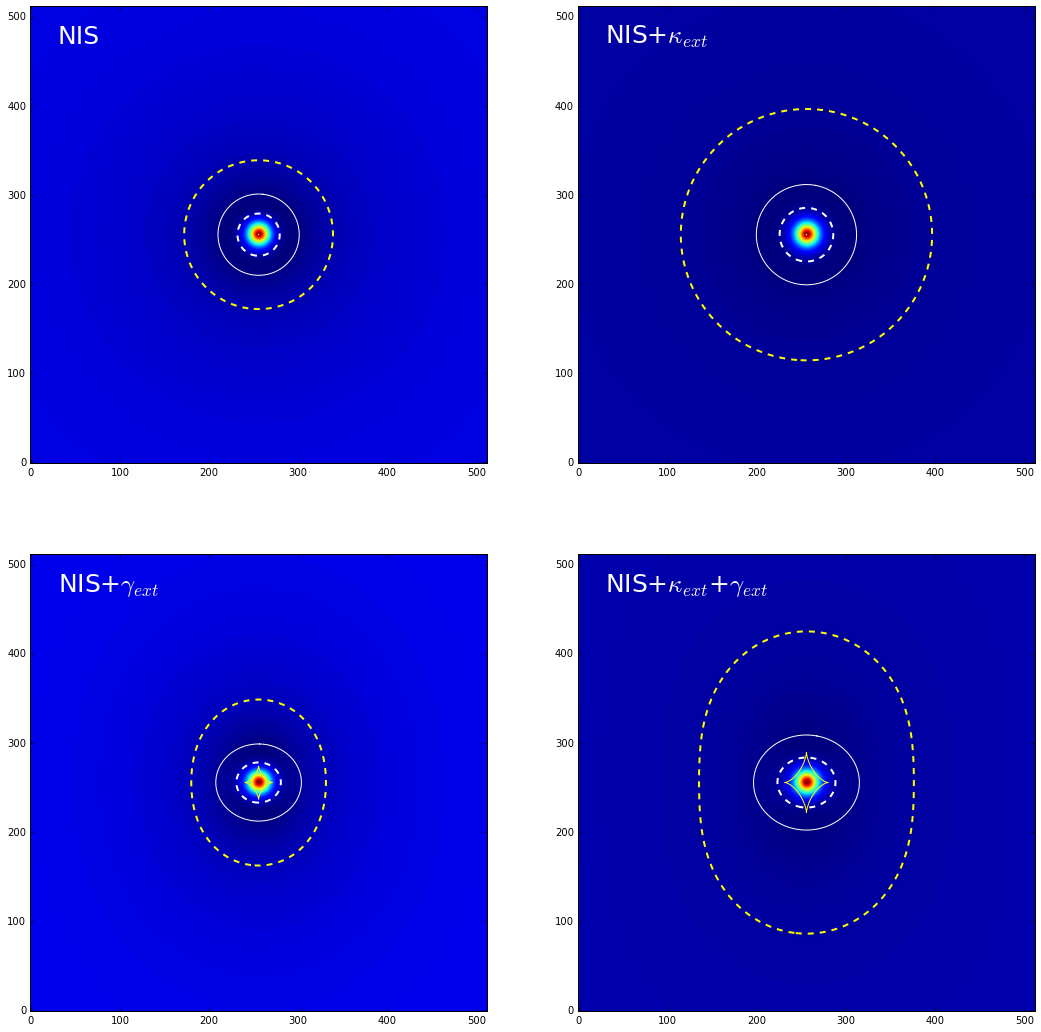

In [5]:
from scipy.ndimage import map_coordinates

lambdat=1-kappa-gamma
lambdar=1-kappa+gamma

lambdatk=1-kappak-gammak
lambdark=1-kappak+gammak

lambdatg=1-kappag-gammag
lambdarg=1-kappag+gammag

lambdatt=1-kappat-gammat
lambdart=1-kappat+gammat

# caustics!
def drawCaustics(ax,cs,colorn,alpha1,alpha2):
    contour=cs.collections[0]
    p=contour.get_paths() # p contains the paths of each individual critical line
    sizevs=np.empty(len(p),dtype=int)


    if (sizevs.size > 0):
        for j in range(len(p)):
            vs = contour.get_paths()[j].vertices 
            sizevs[j]=len(vs)
            x1=[]
            x2=[]
            for i in range(len(vs)):
                xx1,xx2=vs[i]
                x1.append(float(xx1))
                x2.append(float(xx2))
        # these are the points we want to map back on the source plane. 
        # To do that we need to evaluate the deflection angle at their positions
        # using scipy.ndimage.interpolate.map_coordinates we perform a bi-linear interpolation
            a1=map_coordinates(alpha1, [[x2],[x1]],order=1)
            a2=map_coordinates(alpha2, [[x2],[x1]],order=1)
        
        
        # now we can make the mapping using the lens equation:
            y1=x1-a1[0]/(float(xmax-xmin)/npix)
            y2=x2-a2[0]/(float(xmax-xmin)/npix)
        
        # plot the results!
            ax.plot(y1,y2,'-',color=colorn)
        

fig,ax=plt.subplots(2,2,figsize=(18,18))
ax[0,0].imshow((lambdat*lambdar),origin='low')
cst=ax[0,0].contour(lambdat,linestyles='dashed',levels=[0.0],colors='yellow',linewidths=2)
csr=ax[0,0].contour(lambdar,linestyles='dashed',levels=[0.0],colors='white',linewidths=2)
drawCaustics(ax[0,0],cst,'yellow',alpha1,alpha2)
drawCaustics(ax[0,0],csr,'white',alpha1,alpha2)

ax[0,1].imshow((lambdatk*lambdark),origin='low')
cst=ax[0,1].contour(lambdatk,linestyles='dashed',levels=[0.0],colors='yellow',linewidths=2)
csr=ax[0,1].contour(lambdark,linestyles='dashed',levels=[0.0],colors='white',linewidths=2)
drawCaustics(ax[0,1],cst,'yellow',alpha1+alpha1k,alpha2+alpha2k)
drawCaustics(ax[0,1],csr,'white',alpha1+alpha1k,alpha2+alpha2k)

ax[1,0].imshow((lambdatg*lambdarg),origin='low')
cst=ax[1,0].contour(lambdatg,linestyles='dashed',levels=[0.0],colors='yellow',linewidths=2)
csr=ax[1,0].contour(lambdarg,linestyles='dashed',levels=[0.0],colors='white',linewidths=2)
drawCaustics(ax[1,0],cst,'yellow',alpha1+alpha1g,alpha2+alpha2g)
drawCaustics(ax[1,0],csr,'white',alpha1+alpha1g,alpha2+alpha2g)

ax[1,1].imshow((lambdatt*lambdart),origin='low')
cst=ax[1,1].contour(lambdatt,linestyles='dashed',levels=[0.0],colors='yellow',linewidths=2)
csr=ax[1,1].contour(lambdart,linestyles='dashed',levels=[0.0],colors='white',linewidths=2)
drawCaustics(ax[1,1],cst,'yellow',alpha1+alpha1k+alpha1g,alpha2+alpha2k+alpha2g)
drawCaustics(ax[1,1],csr,'white',alpha1+alpha1k+alpha1g,alpha2+alpha2k+alpha2g)

ax[0,0].text(30,470,'NIS',fontsize=25,fontweight=5,color='white')
ax[0,1].text(30,470,'NIS+$\kappa_{ext}$',fontsize=25,fontweight=5,color='white')
ax[1,0].text(30,470,'NIS+$\gamma_{ext}$',fontsize=25,fontweight=5,color='white')
ax[1,1].text(30,470,'NIS+$\kappa_{ext}$+$\gamma_{ext}$',fontsize=25,fontweight=5,color='white')

Those above are the critical lines and the caustics in the four cases. See that they are affected by both the mass sheet and the external shear!
The lensing properties of an axially symmetric lens perturbed by an external shear are totally indistinguishable from those of an elliptical lens withot external perturbations.

# Einstein radii

We can estimate the order of magnitude of the sizes of Einstein radii using the SIS as a reference model. For such lens the Einstein radius is:
$$
\theta_E=4\pi\left(\frac{\sigma_v}{c}\right)^2\frac{D_{LS}}{D_S}
$$

The plot below shows the size of the Einstein radius for three classes of lenses:
* Dwarf satellites ($\sigma_v~10$ km/s)
* Massive ellipticals ($\sigma_v\sim 300$ km/s)
* Galaxy clusters ($\sigma_v \sim 1000$ km/s)


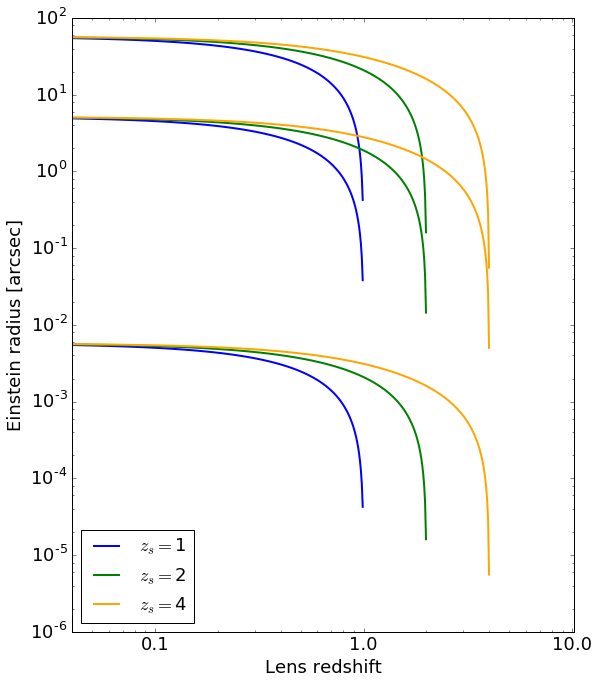

In [36]:
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

zs=np.array([1,2,4])

def EinsteinRadius(sigmav,dls,ds):
    ers=4.0*np.pi*(sigmav/3e5)**2*dls/ds
    return ers

ds=cosmo.angular_diameter_distance(zs)

fig,ax=plt.subplots(1,1,figsize=(9,11))

colors=iter(['blue','green','orange'])
for j in range(zs.size):
    zl=np.linspace(0.02,zs[j]-1e-2,100)
    c=next(colors)
    dls=np.array(zl)
    for i in range(zl.size):
        dls[i]=cosmo.angular_diameter_distance_z1z2(zl[i],zs[j]).value
    ers_clu=EinsteinRadius(1000.0,dls,ds[j])*360.0*3600/np.pi
    ers_ell=EinsteinRadius(300.0,dls,ds[j])*360.0*3600/np.pi
    ers_sat=EinsteinRadius(10.0,dls,ds[j])*360.0*3600/np.pi
    if (j == 0):
        ax.plot(zl,ers_clu,color=c,lw=2,label='$z_s=$'+str(zs[j]))
        ax.plot(zl,ers_ell,color=c,lw=2)
        ax.plot(zl,ers_sat,color=c,lw=2)
    elif (j == 1):
        ax.plot(zl,ers_clu,color=c,lw=2)
        ax.plot(zl,ers_ell,color=c,lw=2,label='$z_s=$'+str(zs[j]))
        ax.plot(zl,ers_sat,color=c,lw=2)       
    else:
        ax.plot(zl,ers_clu,color=c,lw=2)
        ax.plot(zl,ers_ell,color=c,lw=2)
        ax.plot(zl,ers_sat,color=c,lw=2,label='$z_s=$'+str(zs[j]))        
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Lens redshift') 
ax.set_ylabel('Einstein radius [arcsec]')
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.linspace(-1,np.log10(end),7))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f'))
ax.set_xlim([0.04,10.2])
ax.legend(loc='lower left',fontsize=18)
fig.savefig('einstein_radii.png')

# On the mass-sheet degeneracy

The mass-sheet transformation (MST) of the kind

$$
\psi_\lambda=\frac{1-\lambda}{2}x^2+\lambda\psi
$$

changes the convergence as

$$
\kappa_\lambda=(1-\lambda)+\lambda\kappa
$$

and the shear as

$$ 
\gamma_\lambda=\lambda\gamma \;.
$$

If the source plane is isotropically scaled as $y'=\lambda y$, then adimensional quantities such as
* the critical lines
* the image positions
* the image distortions
* the flux ratios
are not affctected by the transformation. On the basis of these observables, then, the whole family of models $\psi_\lambda$ fits the data. This is called the mass-sheet degeneracy.

In the following example, we will apply the MST to the convergence profile of the SIS:
$$
\kappa(x)=\frac{1}{2x}
$$

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


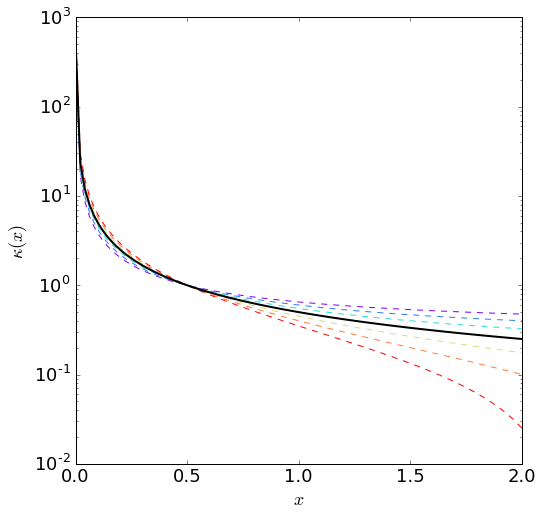

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

def kappa_sis(x,fz):
    return 1.0/2.0/x*fz

def mst(lam,kappa):
    return (1.-lam)+lam*kappa

x=np.linspace(1e-3,2.0,100)
lam=np.linspace(0.7,1.3,7)

ka=kappa_sis(x,1.0)

fig,ax=plt.subplots(1,1,figsize=(8,8))

color=iter(cm.rainbow(np.linspace(0,1,lam.size)))
for i in range(lam.size):
    c=next(color)
    ka_=mst(lam[i],ka)
    ax.plot(x,ka_,'--',color=c)

ax.plot(x,ka,'-',color='black',lw=2)
ax.set_yscale('log')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\kappa(x)$')

One of the possible ways to break the degeneracy is to use sources at multiple redshifts. In this case, the two sources will prove $\kappa(z_1)$ and $\kappa(z_2)=f_z\kappa(z_1)$.

2.22044575346 3.29364351782
1.48332536955 1.48332536955


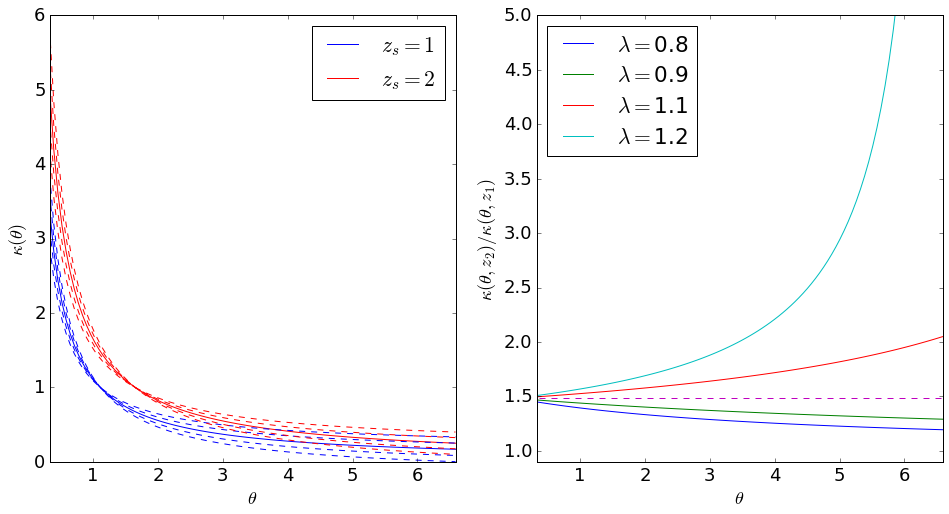

In [62]:
# let's take fz~1.5, i.e. z1=1.0 and z2=2.0 for a lens at zl~0.5
zl=0.5
z1=1.0
z2=2.0
from astropy.cosmology import FlatLambdaCDM

sigmav=300.0


cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
ds1=cosmo.angular_diameter_distance(z1)
ds2=cosmo.angular_diameter_distance(z2)
dls1=cosmo.angular_diameter_distance_z1z2(zl,z1).value
dls2=cosmo.angular_diameter_distance_z1z2(zl,z2).value

er1=EinsteinRadius(sigmav,dls1,ds1)*360.0*3600/np.pi
er2=EinsteinRadius(sigmav,dls2,ds2)*360.0*3600/np.pi

print er1.value, er2.value

fz=ds1/dls1*dls2/ds2
print fz, er2/er1

theta=np.linspace(er2.value/10,2.0*er2.value,100)
x=theta/er1.value
ka_z1=kappa_sis(x,1.0)
x=theta/er2.value
ka_z2=kappa_sis(x,1.0)

fig,ax=plt.subplots(1,2,figsize=(16,8))

ax[0].plot(theta,ka_z1,'-',color='blue',label='$z_s=1$')
ax[0].plot(theta,ka_z2,'-',color='red',label='$z_s=2$')

#lam=np.array([0.7,0.9,1.1,1.3])
lam=np.array([0.8,0.9,1.1,1.2])

for i in range(lam.size):
    ka_z1_=mst(lam[i],ka_z1)
    ax[0].plot(theta,ka_z1_,'--',color='blue')

    ka_z2_=mst(lam[i],ka_z2)
    ax[0].plot(theta,ka_z2_,'--',color='red')
    ax[1].plot(theta,ka_z2_/ka_z1_,label='$\lambda=$'+str(lam[i]))

ax[0].set_xlim([er2.value/10,2*er2.value])
ax[1].set_xlim([er2.value/10,2*er2.value])
ax[1].set_ylim([0.9,5.0])

ax[1].plot([0.0,10.0],[fz,fz],'--')

ax[0].set_xlabel(r'$\theta$')
ax[1].set_xlabel(r'$\theta$')

ax[0].set_ylabel(r'$\kappa(\theta)$')
ax[1].set_ylabel(r'$\kappa(\theta,z_2)/\kappa(\theta,z_1)$')
ax[1].legend(loc='best')
ax[0].legend(loc='best')

fig.savefig('masssheet_zs.pdf')